# 최적 모델 탐색

최적 알고리즘 및 하이퍼 파라미터 탐색 코드입니다.  
구글 코랩 환경에서 실행합니다

<br/>
<br/>

## 한글 폰트 지정

구글에서 한글 사용시 폰트가 깨지는 문제를 해결  

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

NanumGothic


<br/>
<br/>

## 학습할 데이터 불러오기

train_female.csv를 선택하여 업로드 합니다  
train_female.csv는 17.10 ~ 22.02 기간의 데이터입니다  

In [3]:
# Import module 
import pandas as pd
from google.colab import files
import io

In [4]:
# 파일 불러오기
myfile = files.upload()

# 업로드 된 train_female.csv를 train_female DF에 저장합니다
train_female = pd.read_csv(io.BytesIO(myfile['train_female.csv']))

# 의도하지 않게 생성된 인덱스 칼럼을 제거합니다
train_female.drop(['Unnamed: 0'], axis = 1, inplace = True)

Saving train_female.csv to train_female (1).csv


In [5]:
# DF에 데이터가 잘 저장되었는지 확인합니다
train_female

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_한국도로공사,팀명_현대건설,팀명_흥국생명,상대팀_GS칼텍스,상대팀_IBK기업은행,상대팀_KGC인삼공사,상대팀_페퍼저축은행,상대팀_한국도로공사,상대팀_현대건설,상대팀_흥국생명
0,1,88,0.413793,0.444444,0.423077,0.082569,0.839286,0.374302,0.443299,0.097222,...,0,0,0,0,0,0,0,1,0,0
1,0,83,0.422360,0.592593,0.551020,0.096154,0.789474,0.402439,0.421053,0.084746,...,0,0,0,0,0,1,0,0,0,0
2,0,39,0.358696,0.450000,0.300000,0.046512,0.811321,0.324074,0.666667,0.181818,...,0,0,0,0,0,0,0,0,1,0
3,0,47,0.401961,0.533333,0.517241,0.078431,0.881356,0.405941,0.389831,0.058824,...,0,0,0,0,1,0,0,0,0,0
4,1,85,0.458065,0.400000,0.619048,0.018519,0.816327,0.421384,0.467391,0.181818,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0,37,0.357143,0.250000,0.423077,0.022222,0.756098,0.190476,0.267857,0.157895,...,0,0,1,1,0,0,0,0,0,0
944,0,58,0.316770,0.142857,0.400000,0.054795,0.839286,0.311258,0.246753,0.058824,...,0,0,1,0,0,0,0,1,0,0
945,1,62,0.413793,0.357143,0.520000,0.082192,0.804878,0.360360,0.392857,0.163265,...,0,0,1,0,0,1,0,0,0,0
946,0,60,0.327044,0.153846,0.379310,0.037037,0.862385,0.308642,0.382716,0.062500,...,0,0,1,0,0,0,1,0,0,0


<br/>
<br/>

## 학습 데이터와 검증 데이터 분리

7:3 비율로 분리합니다  

In [6]:
# train DF에 학습 데이터 저장
train = train_female.sample(frac=0.7, random_state=0)
train.reset_index(inplace=True, drop=True)

# test DF에 검증 데이터 저장
test = train_female.drop(train.index)
test.reset_index(inplace=True, drop=True)

In [7]:
# DF에 데이터가 잘 저장되었는지 확인합니다
test

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_한국도로공사,팀명_현대건설,팀명_흥국생명,상대팀_GS칼텍스,상대팀_IBK기업은행,상대팀_KGC인삼공사,상대팀_페퍼저축은행,상대팀_한국도로공사,상대팀_현대건설,상대팀_흥국생명
0,1,82,0.464789,0.545455,0.576923,0.083333,0.876404,0.443662,0.375000,0.135593,...,0,1,0,0,0,0,0,0,0,1
1,0,53,0.324786,0.272727,0.458333,0.074627,0.918919,0.304000,0.447761,0.161290,...,0,1,0,1,0,0,0,0,0,0
2,0,86,0.360825,0.400000,0.457143,0.028302,0.785185,0.335135,0.463918,0.139785,...,0,1,0,1,0,0,0,0,0,0
3,0,37,0.302083,0.428571,0.333333,0.081633,0.867647,0.262712,0.611111,0.090909,...,0,1,0,0,1,0,0,0,0,0
4,0,34,0.262626,0.222222,0.400000,0.060000,0.838235,0.209091,0.379310,0.089286,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,37,0.357143,0.250000,0.423077,0.022222,0.756098,0.190476,0.267857,0.157895,...,0,0,1,1,0,0,0,0,0,0
280,0,58,0.316770,0.142857,0.400000,0.054795,0.839286,0.311258,0.246753,0.058824,...,0,0,1,0,0,0,0,1,0,0
281,1,62,0.413793,0.357143,0.520000,0.082192,0.804878,0.360360,0.392857,0.163265,...,0,0,1,0,0,1,0,0,0,0
282,0,60,0.327044,0.153846,0.379310,0.037037,0.862385,0.308642,0.382716,0.062500,...,0,0,1,0,0,0,1,0,0,0


<br/>
<br/>

## pycaret Install & import

In [8]:
# pycaret 및 shap 모듈 설치
!pip install pycaret --quiet
!pip install shap --quiet

# numba 버전 변경
!pip install numba==0.53

# scikit-learn 버전 변경
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2

# pycaret 모듈 Importing
from pycaret.classification import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)


<br/>
<br/>

## 모델 세팅 및 최적 모델 탐색

In [9]:
# setup
exp_clf = setup(data = train, target = '결과', session_id=123)

,Description,Value
0,session_id,123
1,Target,결과
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(664, 24)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='결과',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [10]:
# 최적 모델 탐색을 위한 모델별 결과 비교
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8362,0.9194,0.8478,0.8211,0.8325,0.6725,0.6756,0.024
lightgbm,Light Gradient Boosting Machine,0.8125,0.8932,0.8079,0.8082,0.8054,0.6248,0.6287,0.116
rf,Random Forest Classifier,0.8104,0.8971,0.7852,0.8201,0.8002,0.6200,0.6233,0.693
ada,Ada Boost Classifier,0.7955,0.8937,0.7808,0.8022,0.7877,0.5906,0.5956,0.192
ridge,Ridge Classifier,0.7953,0.0000,0.8162,0.7752,0.7939,0.5911,0.5937,0.030
nb,Naive Bayes,0.7887,0.8618,0.7986,0.7792,0.7849,0.5780,0.5838,0.026
et,Extra Trees Classifier,0.7867,0.8750,0.7889,0.7794,0.7809,0.5732,0.5776,0.548
gbc,Gradient Boosting Classifier,0.7847,0.8884,0.7725,0.7827,0.7754,0.5692,0.5719,0.267
lr,Logistic Regression,0.7221,0.8230,0.7312,0.7083,0.7180,0.4446,0.4467,0.527
dt,Decision Tree Classifier,0.6985,0.6968,0.6510,0.7028,0.6729,0.3945,0.3981,0.030


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [11]:
# 지원모델 목록 출력
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


<br/>
<br/>

## Random Forest 모델 생성 및 튜닝

In [12]:
# Random Forest 모델 채택하여 모델 생성
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8723,0.9583,0.8261,0.9048,0.8636,0.7441,0.7468
1,0.7660,0.8361,0.7826,0.7500,0.7660,0.5321,0.5326
2,0.7447,0.8542,0.6522,0.7895,0.7143,0.4873,0.4945
3,0.8298,0.9027,0.7727,0.8500,0.8095,0.6563,0.6587
4,0.8478,0.8920,0.8182,0.8571,0.8372,0.6945,0.6952
5,0.7174,0.8333,0.7727,0.6800,0.7234,0.4369,0.4406
6,0.8043,0.9072,0.8636,0.7600,0.8085,0.6102,0.6154
7,0.8913,0.9725,0.8182,0.9474,0.8780,0.7810,0.7878
8,0.8696,0.9337,0.8182,0.9000,0.8571,0.7376,0.7405


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
# Random Forest 모델 Tuning
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8936,0.9710,0.9130,0.8750,0.8936,0.7873,0.7880
1,0.7021,0.8370,0.7391,0.6800,0.7083,0.4051,0.4065
2,0.7660,0.8424,0.7826,0.7500,0.7660,0.5321,0.5326
3,0.8511,0.9091,0.9545,0.7778,0.8571,0.7049,0.7211
4,0.8043,0.8958,0.7727,0.8095,0.7907,0.6072,0.6078
5,0.7174,0.8580,0.8182,0.6667,0.7347,0.4390,0.4496
6,0.7826,0.9186,0.9545,0.7000,0.8077,0.5709,0.6078
7,0.8913,0.9602,0.8636,0.9048,0.8837,0.7818,0.7825
8,0.9130,0.9621,0.9545,0.8750,0.9130,0.8264,0.8295


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [14]:
# 튜닝된 모델의 성능 확인
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

<br/>
<br/>

## Prediction

최적 모델인 Random Forest를 이용하여 Predict 시행

In [15]:
# 검증 데이터를 이용하여 predict 시행
prediction = predict_model(tuned_rf, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8627,0.93,0.8973,0.8452,0.8704,0.7246,0.7261


<br/>
<br/>

## 훈련된 모델의 성능 시각화

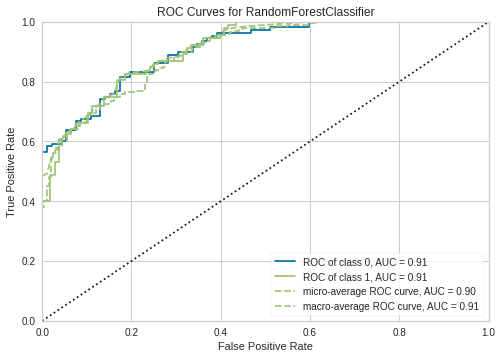

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
# import rf
'''
'auc' - Area Under the Curve -> 기본값
'threshold' - Discrimination Threshold
'pr' - Precision Recall Curve
'confusion_matrix' - Confusion Matrix
'error' - Class Prediction Error
'class_report' - Classification Report
'boundary' - Decision Boundary
'rfe' - Recursive Feature Selection
'learning' - Learning Curve
'manifold' - Manifold Learning
'calibration' - Calibration Curve
'vc' - Validation Curve
'dimension' - Dimension Learning
'feature' - Feature Importance
'feature_all' - Feature Importance (All)
'parameter' - Model Hyperparameter
'lift' - Lift Curve
'gain' - Gain Chart
'tree' - Decision Tree
'ks' - KS Statistic Plot
'''
# ROC curve 시각화
plot_model(tuned_rf)

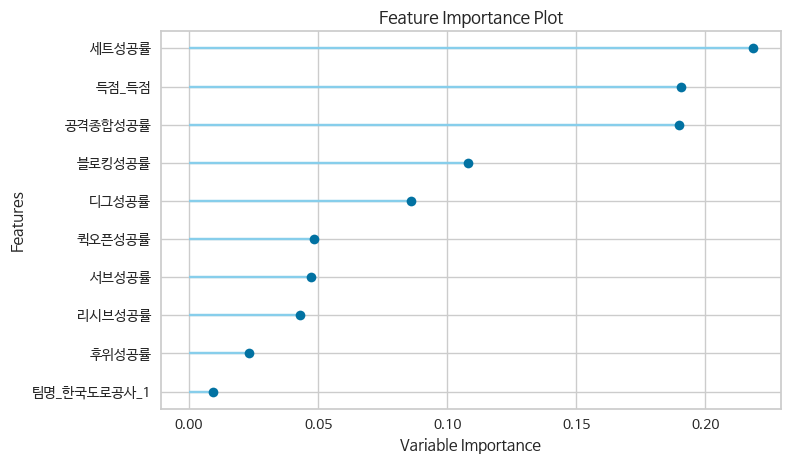

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
# feature 별 중요도 시각화
plt.rc('font', family='NanumBarunGothic')
plot_model(tuned_rf, plot="feature")
plt.show()

# 한글 폰트 깨질 경우 런타임 다시 시작 후 재가동

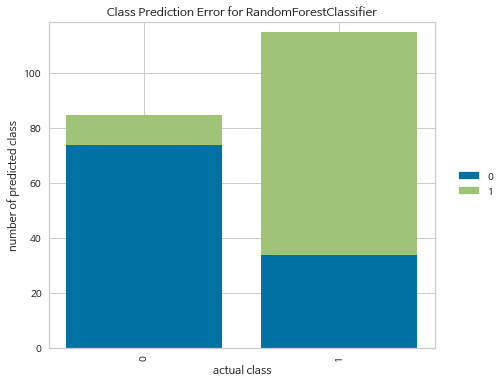

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
# 예측 결과 중 오답 비율 시각화
plot_model(tuned_rf, plot="error")

In [19]:
# 훈련된 모델의 모든 성능정보를 출력
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
# 최종 모델
final_rf = finalize_model(tuned_rf)
print(final_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
             

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


<br/>
<br/>

## 예측할 데이터 불러오기
 
test_female.csv를 선택하여 업로드 합니다  
test_female.csv는 최종적으로 예측해야하는 22.03 ~ 04 기간의 데이터입니다  

In [21]:
# 파일 불러오기
myfile = files.upload()

# 업로드 된 train_male.csv를 train_female DF에 저장합니다
import io
test_female = pd.read_csv(io.BytesIO(myfile['test_female.csv']))

# 의도하지 않게 생성된 인덱스 칼럼을 제거합니다
test_female.drop(['Unnamed: 0'], axis = 1, inplace = True)

Saving test_female.csv to test_female (2).csv


In [22]:
# 경기 결과를 예측하여 test_predictions DF에 저장
test_predictions = predict_model(final_rf, data = test_female)
test_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.75,0.7222,0.6667,0.8,0.7273,0.5,0.5071


,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_흥국생명,상대팀_GS칼텍스,상대팀_IBK기업은행,상대팀_KGC인삼공사,상대팀_페퍼저축은행,상대팀_한국도로공사,상대팀_현대건설,상대팀_흥국생명,Label,Score
0,1,47,0.342342,0.428571,0.266667,0.074074,0.893333,0.314815,0.339286,0.084746,...,0,0,0,0,0,0,0,1,0,0.7792
1,0,60,0.356643,0.000000,0.442623,0.048780,0.854369,0.320988,0.385714,0.075758,...,0,0,0,0,0,0,0,1,0,0.6107
2,1,76,0.407407,0.000000,0.464789,0.044944,0.864198,0.380165,0.440000,0.250000,...,0,0,0,1,0,0,0,0,1,0.7670
3,1,71,0.456693,0.444444,0.531250,0.036585,0.783784,0.384615,0.364865,0.144928,...,0,0,0,0,1,0,0,0,1,0.6767
4,0,62,0.377953,0.384615,0.500000,0.054054,0.878788,0.339130,0.347826,0.138889,...,0,0,1,0,0,0,0,0,1,0.6483
5,0,73,0.405405,0.416667,0.461538,0.032258,0.784946,0.393333,0.292135,0.149254,...,0,0,0,1,0,0,0,0,0,0.5263
6,0,82,0.348718,0.421053,0.350000,0.019802,0.892308,0.306122,0.370000,0.164384,...,0,0,0,0,0,0,1,0,0,0.5856
7,1,49,0.391753,0.333333,0.423077,0.102041,0.824561,0.406250,0.448276,0.115385,...,0,0,0,0,0,0,0,1,1,0.5568
8,1,85,0.390110,0.411765,0.384615,0.036697,0.834586,0.345550,0.536842,0.126582,...,0,0,0,0,0,1,0,0,1,0.5978
9,1,75,0.354430,0.300000,0.444444,0.063158,0.773913,0.339744,0.227273,0.156627,...,1,0,1,0,0,0,0,0,0,0.6076


In [23]:
# 정답률 조회
len(test_predictions[test_predictions['결과'] == test_predictions['Label']].index) / len(test_predictions.index)

0.75